# FEATURE SELECTION USING CORRELATION
AIM: DROPPING FEATURES WITH HIGH CORRELATION AND SAME EFFECT ON DEPENDENT VARIABLE

In this step we would considering features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# importing train_test_split
from sklearn.model_selection import train_test_split
# importing seaborn
import seaborn as sns

# importing warnings
import warnings

In [2]:
pd.pandas.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('project_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [5]:
df.shape

(1718, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

Since there are no null values, we can easily proceed with feature selection

In [7]:
# Droping date column
df.drop(labels = ['Date'], axis = 1, inplace = True)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [9]:
# normalize the dataset using the MinMaxScaler
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [10]:
# taking Adj Close  as target variable
# independent variables x
X = df2.drop(columns=['Adj Close'])
# dependent variable y
y = df2['Adj Close']

In [11]:
# using a 70-30 train-test set split with a random state of 42
# this separation helps to prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

In [12]:
# shape of test and train data
X_train.shape, X_test.shape

((1202, 79), (516, 79))

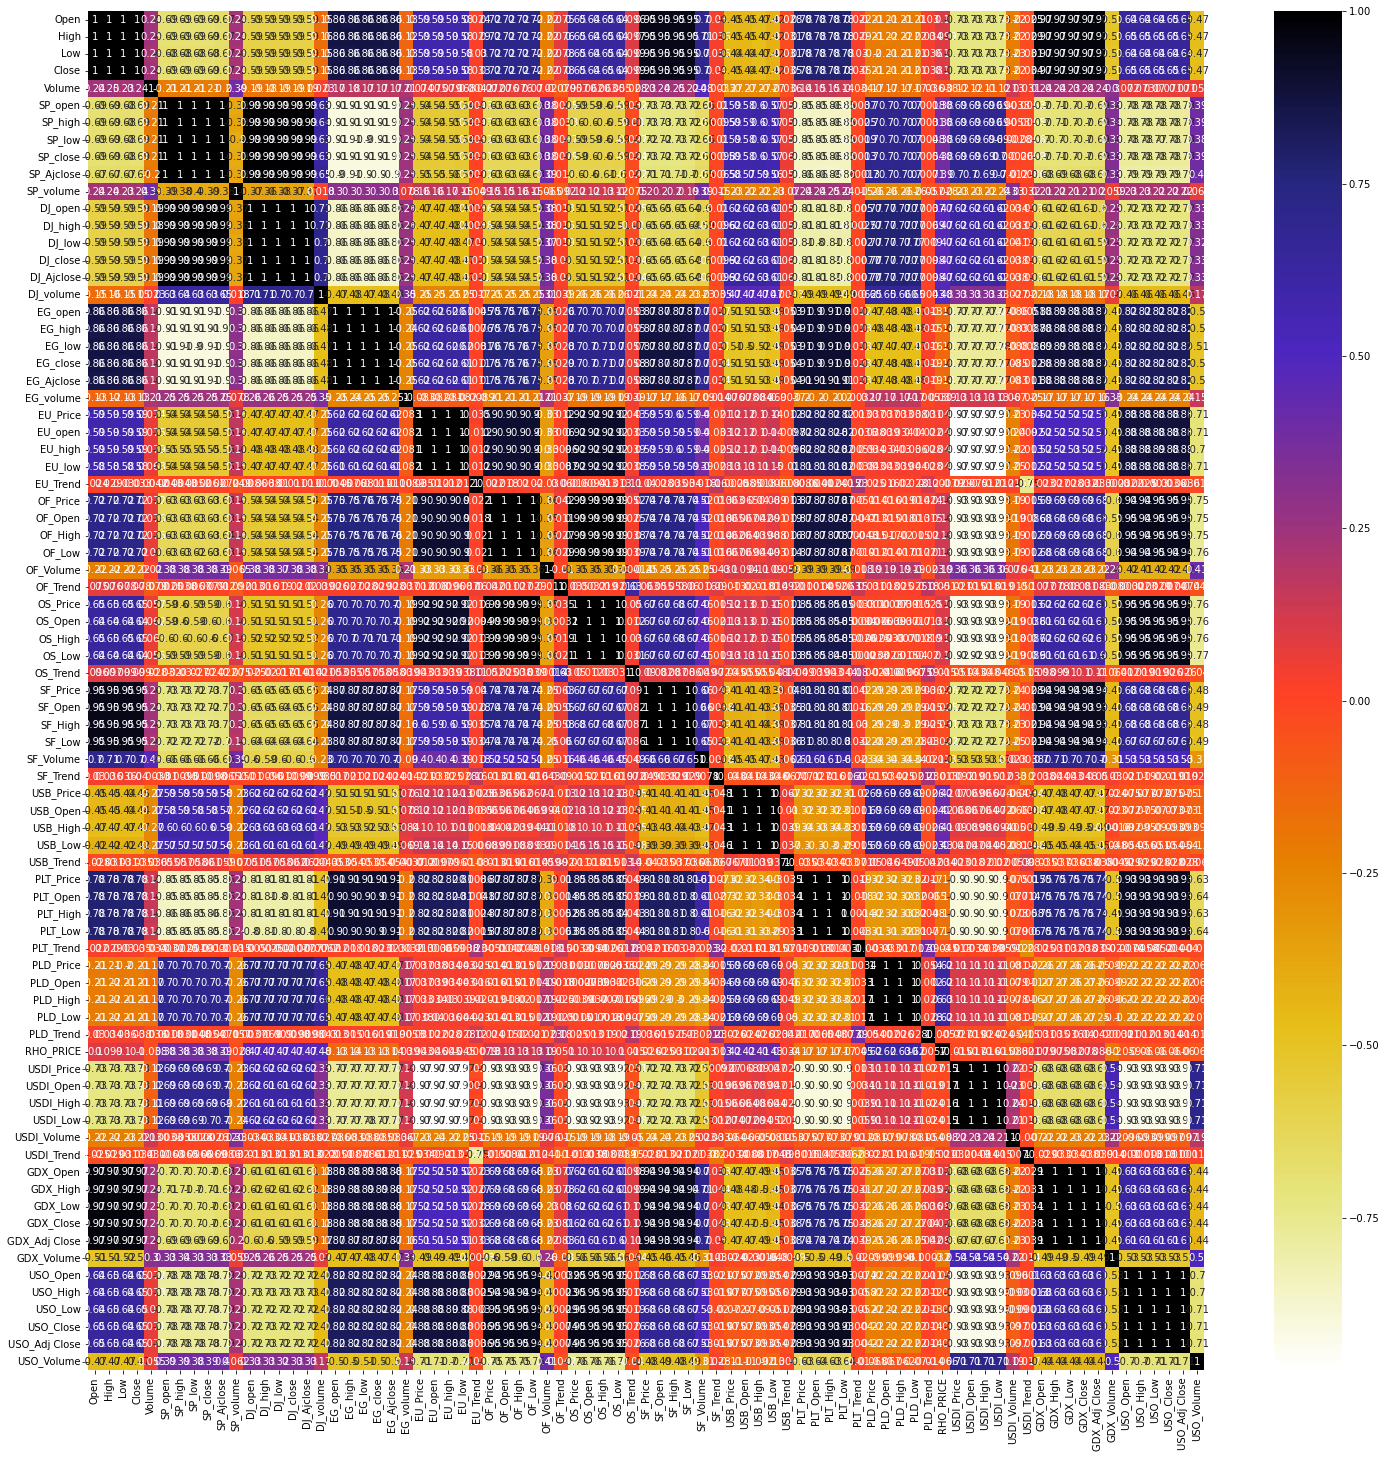

In [13]:
# using pearson correlation
plt.figure(figsize = (25, 25))
cor = X_train.corr()
# plotting a heatmap to create visualization
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [14]:
# creating a function to select highly correlated features
# when two features have high correlation, droping one of the two features

def correlation(dataset, threshold):
    col_corr = set() # set of all correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # our interest is absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.90)
len(set(corr_features))

56

In [16]:
corr_features

{'Close',
 'DJ_Ajclose',
 'DJ_close',
 'DJ_high',
 'DJ_low',
 'DJ_open',
 'EG_Ajclose',
 'EG_close',
 'EG_high',
 'EG_low',
 'EG_open',
 'EU_high',
 'EU_low',
 'EU_open',
 'GDX_Adj Close',
 'GDX_Close',
 'GDX_High',
 'GDX_Low',
 'GDX_Open',
 'High',
 'Low',
 'OF_High',
 'OF_Low',
 'OF_Open',
 'OF_Price',
 'OS_High',
 'OS_Low',
 'OS_Open',
 'OS_Price',
 'PLD_High',
 'PLD_Low',
 'PLD_Open',
 'PLT_High',
 'PLT_Low',
 'PLT_Open',
 'PLT_Price',
 'SF_High',
 'SF_Low',
 'SF_Open',
 'SF_Price',
 'SP_Ajclose',
 'SP_close',
 'SP_high',
 'SP_low',
 'USB_High',
 'USB_Low',
 'USB_Open',
 'USDI_High',
 'USDI_Low',
 'USDI_Open',
 'USDI_Price',
 'USO_Adj Close',
 'USO_Close',
 'USO_High',
 'USO_Low',
 'USO_Open'}

In [17]:
# dropping features having over 90% correlation
X_train = X_train.drop(corr_features, axis = 1).reset_index(drop = True)
# applying same transformation to test data set
X_test = X_test.drop(corr_features, axis = 1).reset_index(drop = True)

In [18]:
# shape of test and train data after feature selection using correlation
X_train.shape, X_test.shape

((1202, 23), (516, 23))

In [19]:
X_train

,Open,Volume,SP_open,SP_volume,DJ_volume,EG_volume,EU_Price,EU_Trend,OF_Volume,OF_Trend,OS_Trend,SF_Volume,SF_Trend,USB_Price,USB_Trend,PLT_Trend,PLD_Price,PLD_Trend,RHO_PRICE,USDI_Volume,USDI_Trend,GDX_Volume,USO_Volume
0,0.202961,0.040698,0.483424,0.479314,0.129503,0.104914,0.535382,0.0,0.509438,0.0,0.0,0.108155,0.0,0.451887,1.0,1.0,0.442473,1.0,0.471154,0.232278,1.0,0.253544,0.293831
1,0.198395,0.055646,0.703444,0.046931,0.268087,0.112361,0.304483,1.0,0.488764,1.0,1.0,0.097599,1.0,0.533227,0.0,1.0,0.517709,1.0,0.396154,0.114878,0.0,0.134190,0.216088
2,0.089236,0.046234,0.506636,0.106836,0.072828,0.110016,0.195658,0.0,0.330954,0.0,0.0,0.076440,1.0,0.431685,0.0,1.0,0.197442,0.0,0.342308,0.221140,1.0,0.273660,0.142923
3,0.333702,0.014980,0.918786,0.091926,0.397007,0.143876,0.548915,1.0,0.410812,0.0,0.0,0.055673,0.0,0.801701,0.0,0.0,0.676295,0.0,0.715385,0.163351,0.0,0.122451,0.150562
4,0.548838,0.134660,0.217915,0.231582,0.116814,0.113583,0.787426,1.0,0.459478,0.0,0.0,0.027886,0.0,0.145667,0.0,0.0,0.297160,0.0,0.442308,0.173228,0.0,0.100711,0.081606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,0.386967,0.086661,0.562942,0.052427,0.069869,0.105591,0.272625,1.0,0.462588,1.0,1.0,0.090972,1.0,0.093567,0.0,1.0,0.337528,1.0,0.248077,0.156066,0.0,0.243928,0.529781
1198,0.295102,0.075524,0.657546,0.085199,0.321018,0.209848,0.091345,0.0,0.762063,0.0,0.0,0.050960,0.0,0.456140,1.0,0.0,0.419435,1.0,0.394231,0.124194,1.0,0.471005,0.452510
1199,0.067654,0.097703,0.528387,0.104526,0.102858,0.066659,0.155061,1.0,0.318855,1.0,1.0,0.095636,0.0,0.517278,0.0,1.0,0.218692,1.0,0.326923,0.303727,0.0,0.375219,0.107864
1200,0.251522,0.059500,0.847980,0.151882,0.343426,0.102701,0.392162,0.0,0.478481,1.0,1.0,0.071187,1.0,0.526847,1.0,0.0,0.762589,1.0,0.596154,0.208532,1.0,0.139108,0.073588


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1202 non-null   float64
 1   Volume       1202 non-null   float64
 2   SP_open      1202 non-null   float64
 3   SP_volume    1202 non-null   float64
 4   DJ_volume    1202 non-null   float64
 5   EG_volume    1202 non-null   float64
 6   EU_Price     1202 non-null   float64
 7   EU_Trend     1202 non-null   float64
 8   OF_Volume    1202 non-null   float64
 9   OF_Trend     1202 non-null   float64
 10  OS_Trend     1202 non-null   float64
 11  SF_Volume    1202 non-null   float64
 12  SF_Trend     1202 non-null   float64
 13  USB_Price    1202 non-null   float64
 14  USB_Trend    1202 non-null   float64
 15  PLT_Trend    1202 non-null   float64
 16  PLD_Price    1202 non-null   float64
 17  PLD_Trend    1202 non-null   float64
 18  RHO_PRICE    1202 non-null   float64
 19  USDI_V

## MODELING & HYPERTUNING

In [21]:
# import LinearRegression
from sklearn.linear_model import LinearRegression
# import Lasso
from sklearn.linear_model import Lasso
# import Ridge
from sklearn.linear_model import Ridge
# import ElasticNet
from sklearn.linear_model import ElasticNet
# import StandardScaler and QuantileTransformer for scaling
from sklearn.preprocessing import StandardScaler, QuantileTransformer
# import Pipeline in order to change processing steps
from sklearn.pipeline import Pipeline 
# import GridSearchCV & RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# import RepeatedKFold (define model evaluation method)
from sklearn.model_selection import RepeatedKFold

In [22]:
model_params = {
    'Lasso' : {
        'model': Lasso(),
        'scale': StandardScaler(),
        'params' : {'alpha': np.arange(0, 1, 0.01),
                     'selection': ['cyclic','random']
                    }
    },
    'Ridge' : {
        'model': Ridge(),
        'scale': StandardScaler(),
        'params' : {'alpha': np.arange(0, 1, 0.01),
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
                    }
    },
     'ElasticNet' : {
        'model': ElasticNet(),
        'scale': StandardScaler(),
        'params' : {'alpha': np.arange(0, 1, 0.01),
                    'selection': ['cyclic','random']
                    }
    }
    
}

In [23]:
score = []

for model_name, mp in model_params.items():
    #clf = GridSearchCV(mp['model'], mp['params'], cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1), return_train_score = False)
    clf = RandomizedSearchCV(mp['model'], mp['params'], 
                             cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1),
                             n_iter=50,
                             scoring = 'neg_mean_absolute_error',n_jobs = 4,
                             verbose = 5, 
                             return_train_score = True,
                             random_state=42)
    clf.fit(X_train, y_train)
    score.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

Fitting 30 folds for each of 50 candidates, totalling 1500 fits
Fitting 30 folds for each of 50 candidates, totalling 1500 fits
Fitting 30 folds for each of 50 candidates, totalling 1500 fits


In [24]:
# best parameter based on each model
pd.DataFrame(score, columns = ['model', 'best_score', 'best_params'])

,model,best_score,best_params
0,Lasso,-0.125790,"{'selection': 'random', 'alpha': 0.04}"
1,Ridge,-0.006871,"{'solver': 'saga', 'alpha': 0.03}"
2,ElasticNet,-0.092757,"{'selection': 'random', 'alpha': 0.04}"


In [25]:
# best model
clf.best_estimator_

ElasticNet(alpha=0.04, selection='random')

In [26]:
# creates best model
mod = ElasticNet(alpha=0.04, selection='random')

In [27]:
mod.fit(X_train,y_train)

ElasticNet(alpha=0.04, selection='random')

## MODEL PERFORMANCE

In [28]:
# import mean_absolute_error
from sklearn.metrics import mean_absolute_error
# import mean_squared_error
from sklearn.metrics import mean_squared_error
# import r2_score
from sklearn.metrics import r2_score

In [29]:
# prediction value
pred = mod.predict(X_test)

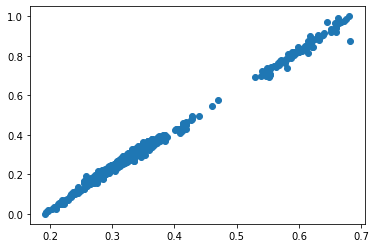

In [30]:
# create a scatter plot of the  predicted value (ie pred) and true value (ie y_test)
plt.scatter(pred, y_test)

In [31]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)
round(mae, 3)

0.086

In [32]:
# Residual Sum of Squares (RSS)
rss = np.sum(np.square(y_test - pred))
round(rss, 3) 

6.911

In [33]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, pred))
round(rmse, 3) 

0.116

In [34]:
# R-Squared
r2_score = r2_score(y_test, pred)
round(r2_score, 3) 

0.753